In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

cls_loss = nn.CrossEntropyLoss()

model = MLPModel()
lr = 0.005 

# Pytorch Optimize 

## Reference
### SGD (Momentum, Nesterov)   
https://pytorch.org/docs/master/generated/torch.optim.SGD.html#torch.optim.SGD
  
### RMSProp
https://pytorch.org/docs/master/generated/torch.optim.RMSprop.html#torch.optim.RMSprop
  
### Adagrad
https://pytorch.org/docs/master/generated/torch.optim.Adagrad.html#torch.optim.Adagrad

### Adadelta
https://pytorch.org/docs/master/generated/torch.optim.Adadelta.html#torch.optim.Adadelta
  
### Adam
https://pytorch.org/docs/master/generated/torch.optim.Adam.html#torch.optim.Adam

### AdamW
https://pytorch.org/docs/master/generated/torch.optim.AdamW.html#torch.optim.AdamW
  
### SparseAdam
https://pytorch.org/docs/master/generated/torch.optim.SparseAdam.html#torch.optim.SparseAdam
  
### Adamax
https://pytorch.org/docs/master/generated/torch.optim.Adamax.html#torch.optim.Adamax
  
### ASGD
https://pytorch.org/docs/master/generated/torch.optim.ASGD.html#torch.optim.ASGD
  
### LBFGS
https://pytorch.org/docs/master/generated/torch.optim.LBFGS.html#torch.optim.LBFGS
  
### RProp
https://pytorch.org/docs/master/generated/torch.optim.Rprop.html#torch.optim.Rprop

In [2]:
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

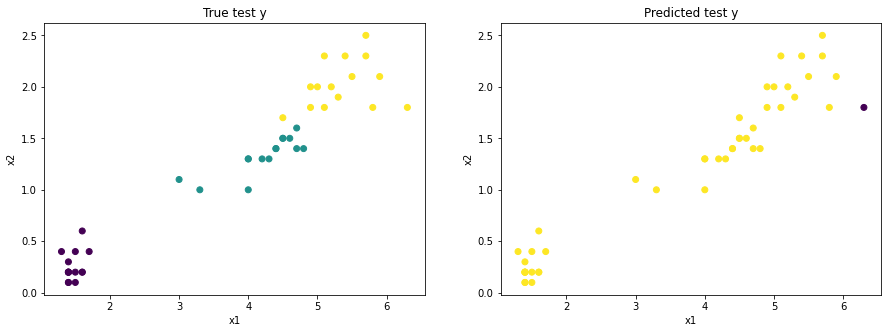

Epoch:  0 Accuracy:  31.11111111111111 %


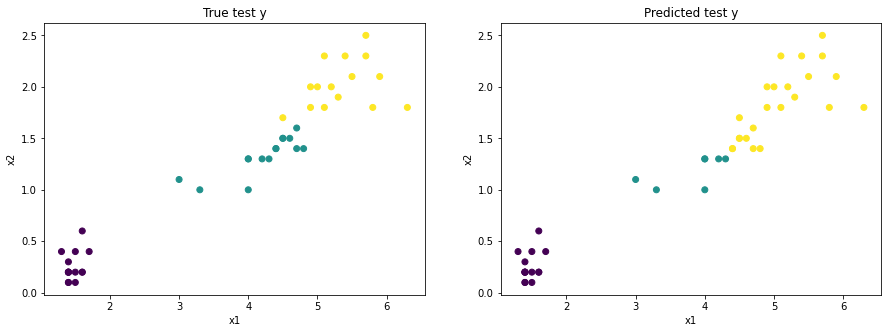

Epoch:  200 Accuracy:  82.22222222222221 %


In [3]:
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 400 
for i in range(epoch):
    
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(X_train)
    true_y = torch.Tensor(y_train).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step()  
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(X_test)
    true_y = torch.Tensor(y_test).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: 
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(X_test)
        true_y = torch.Tensor(y_test)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) 
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

# SGD default value
lr : 1e-2  
momentum : 0  
alpha : 0.99  
eps : 1e-8  
centerd : False  
weight_decay : 0  

In [4]:
model = MLPModel()
lr = 0.005 
optimzer=torch.optim.RMSprop(model.parameters(),lr=lr,alpha=0.99,eps=1e-08)

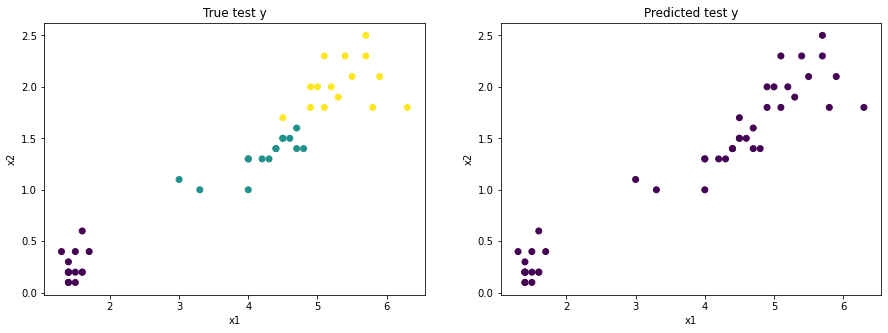

Epoch:  0 Accuracy:  33.33333333333333 %


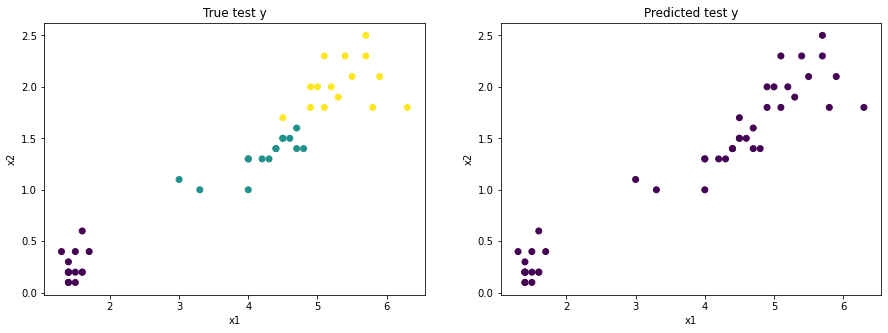

Epoch:  200 Accuracy:  33.33333333333333 %


In [5]:
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 400 
for i in range(epoch):
    
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(X_train)
    true_y = torch.Tensor(y_train).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step()  
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(X_test)
    true_y = torch.Tensor(y_test).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: 
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(X_test)
        true_y = torch.Tensor(y_test)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) 
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

# RMSProp default value
lr : 1e-2  
momentum : 0  
alpha : 0.99  
eps : 1e-8  
centered : False  
weight_decay : 0  

In [6]:
model = MLPModel()
lr = 0.005 
optimzer=torch.optim.Adagrad(model.parameters(),lr=lr)

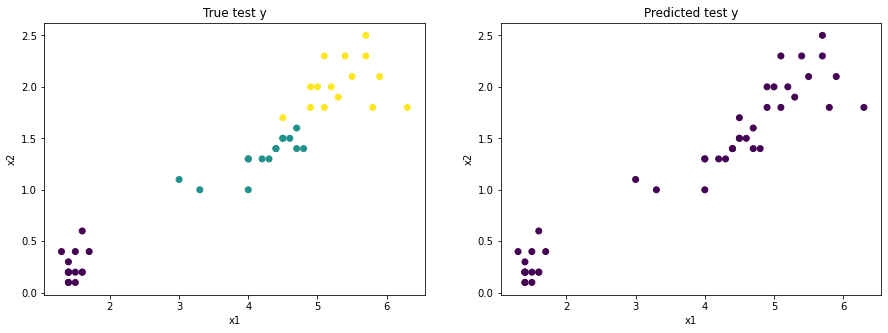

Epoch:  0 Accuracy:  33.33333333333333 %


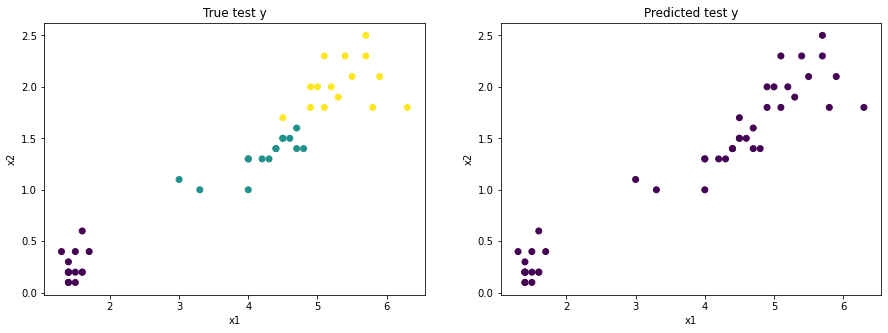

Epoch:  200 Accuracy:  33.33333333333333 %


In [7]:
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 400 
for i in range(epoch):
    
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(X_train)
    true_y = torch.Tensor(y_train).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step()  
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(X_test)
    true_y = torch.Tensor(y_test).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: 
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(X_test)
        true_y = torch.Tensor(y_test)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) 
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

# Adagrad default value
lr : 1e-2  
lr_decay : 0  
weight_decay : 0  
eps : 1e-10  

In [8]:
model = MLPModel()
lr = 0.005 
optimizer=torch.optim.Adadelta(model.parameters(),lr=lr)

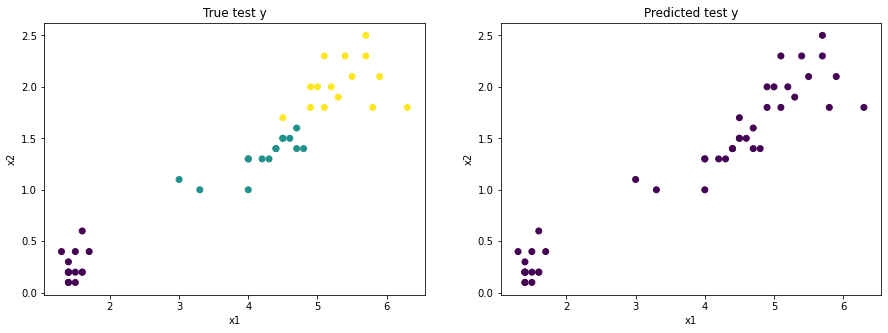

Epoch:  0 Accuracy:  33.33333333333333 %


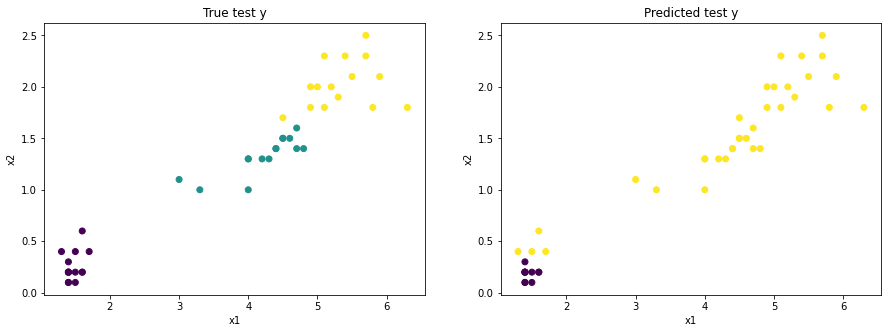

Epoch:  200 Accuracy:  33.33333333333333 %


In [9]:
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 400 
for i in range(epoch):
    
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(X_train)
    true_y = torch.Tensor(y_train).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step()  
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(X_test)
    true_y = torch.Tensor(y_test).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: 
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(X_test)
        true_y = torch.Tensor(y_test)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) 
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

# Adadelta default value
rho : 0.9  
eps : 1e-6  
lr : 1.0  
weight_decay : 0  

In [10]:
model = MLPModel()
lr = 0.005 
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

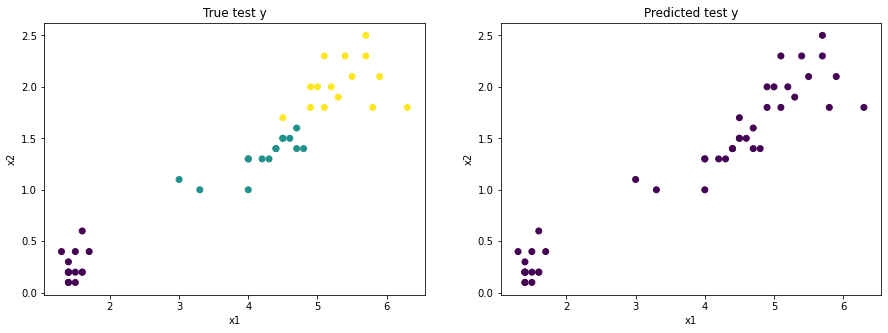

Epoch:  0 Accuracy:  33.33333333333333 %


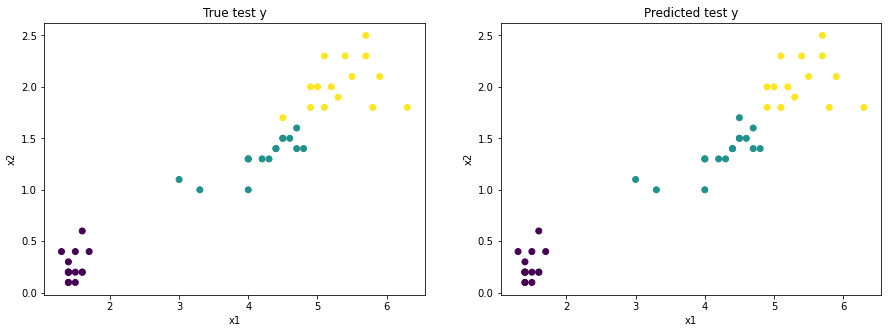

Epoch:  200 Accuracy:  97.77777777777777 %


In [11]:
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 400 
for i in range(epoch):
    
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(X_train)
    true_y = torch.Tensor(y_train).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step()  
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(X_test)
    true_y = torch.Tensor(y_test).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: 
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(X_test)
        true_y = torch.Tensor(y_test)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) 
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

# Adam default value
lr : 1e-3  
betas : 0.9, 0.999  
eps : 1e-8  
weight_decay : 0  
amsgrad : False  

In [12]:
model = MLPModel()
lr = 0.005 
optimizer=torch.optim.Adamax(model.parameters(),lr=lr)

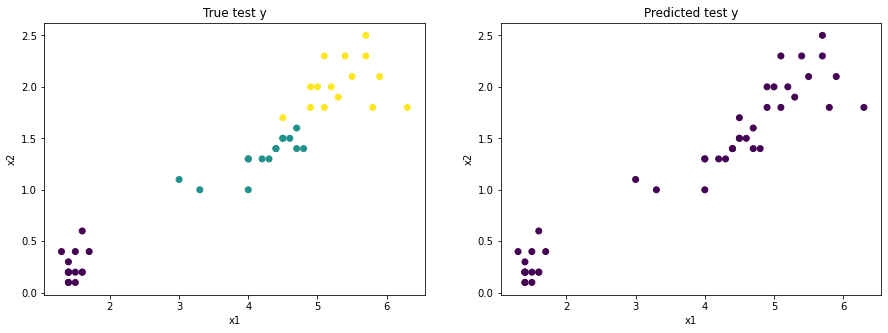

Epoch:  0 Accuracy:  33.33333333333333 %


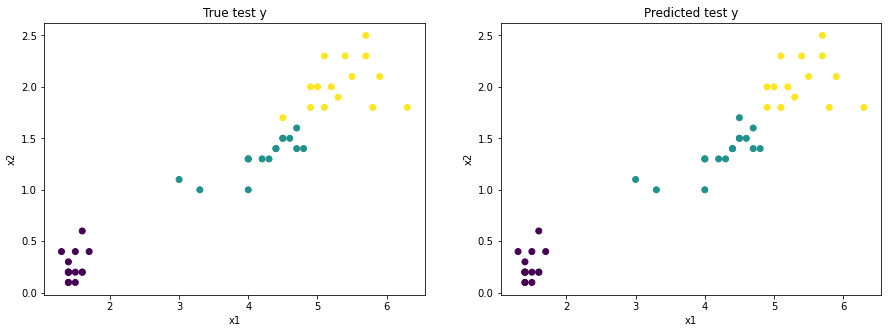

Epoch:  200 Accuracy:  97.77777777777777 %


In [13]:
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 400 
for i in range(epoch):
    
    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(X_train)
    true_y = torch.Tensor(y_train).long()
    pred_y = model(input_x)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step()  
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(X_test)
    true_y = torch.Tensor(y_test).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0: 
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(X_test)
        true_y = torch.Tensor(y_test)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) 
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

# AdaMax
lr : 2e-3  
betas : [0.9,0.999]  
eps : 1e-8  
weight_decay : 0  